In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('Smoking Data.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


# Some Analysis

In [5]:
import seaborn as sns

In [6]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

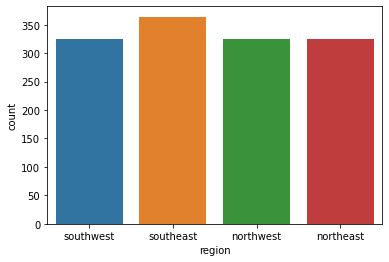

In [8]:
sns.countplot(x= 'region', data =df)

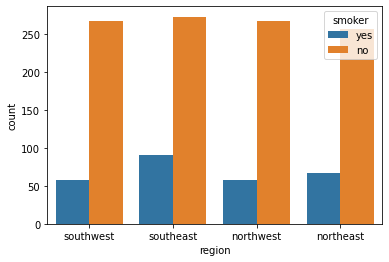

In [12]:
sns.countplot(x = 'region', data = df, hue = 'smoker')

# Model preparation

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df.region = le.fit_transform(df['region'])
df.sex = le.fit_transform(df['sex'])

In [24]:
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,yes
1,2,18,1,33.770,1,no
2,2,28,1,33.000,3,no
3,1,33,1,22.705,0,no
4,1,32,1,28.880,0,no


In [25]:
from sklearn.model_selection import train_test_split as tts

In [26]:
xtrain, xtest, ytrain, ytest = tts(df.drop('smoker', axis=1), df['smoker'],train_size=0.7, random_state=1 )

In [27]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [28]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [29]:
ytrain.value_counts()

no     743
yes    193
Name: smoker, dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [33]:
testing = clf.predict(xtest)

In [34]:
testing #predicted

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', '

In [36]:
import numpy as np
np.array(ytest) #Actual

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

In [42]:
clf.score(xtest, ytest)

0.6691542288557214

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

# Precision, recall, f1-score

In [45]:
print (classification_report(ytest, testing))

              precision    recall  f1-score   support

          no       0.80      0.78      0.79       321
         yes       0.20      0.22      0.21        81

    accuracy                           0.67       402
   macro avg       0.50      0.50      0.50       402
weighted avg       0.68      0.67      0.67       402



In [46]:
xtest.shape

(402, 5)

In [47]:
confusion_matrix(ytest, testing)

array([[251,  70],
       [ 63,  18]], dtype=int64)

In [48]:
con_mat = confusion_matrix(ytest, testing)

In [49]:
con_mat

array([[251,  70],
       [ 63,  18]], dtype=int64)

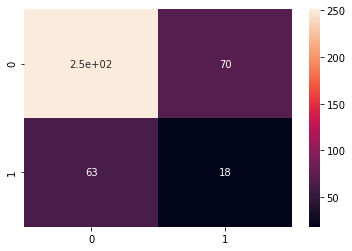

In [52]:
sns.heatmap(con_mat, annot=True)

In [54]:
tp,fn,fp,tn = confusion_matrix (ytest,testing).reshape(-1)

In [55]:
tp

251

In [56]:
fn

70

In [57]:
fp

63

In [58]:
tn

18

# Accuracy

In [59]:
(tp+tn)/(tp+tn+fp+fn)

0.6691542288557214

# ROC

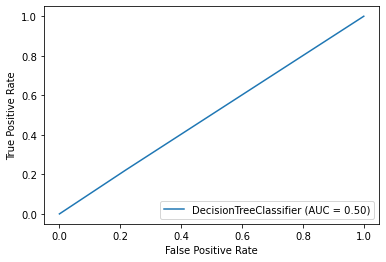

In [60]:
plot_roc_curve (clf,xtest,ytest)

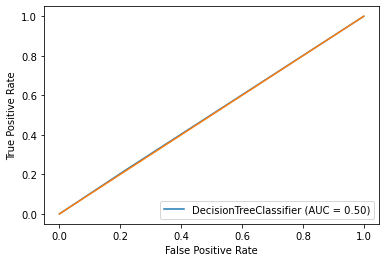

In [61]:
import matplotlib.pyplot as plt

plot_roc_curve (clf,xtest,ytest)
plt.plot([0,1], [0,1])

# Positive predictive value (PPV)

In [62]:
tp/(tp+fp)

0.7993630573248408

# True Positive Rate (TPR)

In [63]:
tp/(tp+fn)

0.7819314641744548

# False Positive Rate (FPR)

In [64]:
fp/(fp+tn)

0.7777777777777778

# specificity, selectivity or true negative rate (TNR)

In [65]:
tn/(tn+fp)

0.2222222222222222

# Threat Score (TS) or Critical Sucess Index (CSI)

In [66]:
tp/(tp+fn+fp)

0.6536458333333334

# False Discovery Rate

In [67]:
fp/(tp+fp)

0.20063694267515925

In [ ]:
#Thanks